In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.compose import TransformedTargetRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder





# loading the data
df = pd.read_csv("data/Euro_Salary.csv")


# Performing some EDA 

In [97]:
# finding missing values 

df.isnull().sum()


Timestamp                                                   0
Age                                                        27
Gender                                                     10
City                                                        0
Position                                                    6
Total years of experience                                  16
Years of experience in Germany                             32
Seniority level                                            12
Your main technology / programming language               127
Other technologies/programming languages you use often    157
Yearly brutto salary (without bonus and stocks) in EUR      0
Yearly bonus + stocks in EUR                              424
Number of vacation days                                    68
Employment status                                          17
Сontract duration                                          29
Main language at work                                      16
Company 

In [98]:
# looking at all the columns data types
df.dtypes

Timestamp                                                  object
Age                                                       float64
Gender                                                     object
City                                                       object
Position                                                   object
Total years of experience                                  object
Years of experience in Germany                             object
Seniority level                                            object
Your main technology / programming language                object
Other technologies/programming languages you use often     object
Yearly brutto salary (without bonus and stocks) in EUR    float64
Yearly bonus + stocks in EUR                               object
Number of vacation days                                    object
Employment status                                          object
Сontract duration                                          object
Main langu

Creating our target variable

In [99]:
df["Bonus"] = pd.to_numeric(df["Yearly bonus + stocks in EUR"], downcast="float", errors="coerce")
df["Bonus"].fillna(0, inplace=True)
df["Total Compensation"] = df["Yearly brutto salary (without bonus and stocks) in EUR"] + df["Bonus"]
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Bonus,Total Compensation
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,30,Full-time employee,Unlimited contract,English,51-100,Product,5000.0,85000.0
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product,0.0,80000.0
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,120000.0,240000.0
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,0.0,54000.0
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,0.0,62000.0


In [100]:
# looking at the distribution of categorical variables 
categorical_features = ['Gender', 'City', 'Seniority level', 'Your main technology / programming language', 'Main language at work', 'Company size', 'Company type']
for feature in categorical_features:
    print(df[feature].value_counts())

Male       1049
Female      192
Diverse       2
Name: Gender, dtype: int64
Berlin         681
Munich         236
Frankfurt       44
Hamburg         40
Stuttgart       26
              ... 
Nuremberg        1
Lübeck           1
Malta            1
Dresden          1
Saarbrücken      1
Name: City, Length: 119, dtype: int64
Senior                                       565
Middle                                       366
Lead                                         166
Junior                                        79
Head                                          44
Principal                                      3
student                                        1
Intern                                         1
Entry level                                    1
Working Student                                1
C-Level                                        1
no idea, there are no ranges in the firm       1
Student                                        1
intern                                   

In [101]:
df.isnull().sum()

Timestamp                                                   0
Age                                                        27
Gender                                                     10
City                                                        0
Position                                                    6
Total years of experience                                  16
Years of experience in Germany                             32
Seniority level                                            12
Your main technology / programming language               127
Other technologies/programming languages you use often    157
Yearly brutto salary (without bonus and stocks) in EUR      0
Yearly bonus + stocks in EUR                              424
Number of vacation days                                    68
Employment status                                          17
Сontract duration                                          29
Main language at work                                      16
Company 

In [102]:
df['Seniority level'].value_counts()

Senior                                       565
Middle                                       366
Lead                                         166
Junior                                        79
Head                                          44
Principal                                      3
student                                        1
Intern                                         1
Entry level                                    1
Working Student                                1
C-Level                                        1
no idea, there are no ranges in the firm       1
Student                                        1
intern                                         1
Key                                            1
C-level executive manager                      1
Director                                       1
No level                                       1
CTO                                            1
Work Center Manager                            1
Manager             

Some Data Prep

In [103]:
# my goal is to extract non numerical values out of the columns I want to be floats 

columns_to_clean = ['Total years of experience', 'Years of experience in Germany', 'Number of vacation days', 'Yearly bonus + stocks in EUR']

# Extracting numeric values from text
for col in columns_to_clean:
    df[col] = df[col].str.extract('(\d+)', expand=False).astype(float)

# Removing commas from the columns and converting to float
columns_to_convert = ['Total years of experience', 'Years of experience in Germany', 'Number of vacation days', 'Yearly bonus + stocks in EUR']
df[columns_to_convert] = df[columns_to_convert].replace(',', '.', regex=True).astype(float)

In [104]:
# now im just checking to make sure things look good 
df.dtypes

Timestamp                                                  object
Age                                                       float64
Gender                                                     object
City                                                       object
Position                                                   object
Total years of experience                                 float64
Years of experience in Germany                            float64
Seniority level                                            object
Your main technology / programming language                object
Other technologies/programming languages you use often     object
Yearly brutto salary (without bonus and stocks) in EUR    float64
Yearly bonus + stocks in EUR                              float64
Number of vacation days                                   float64
Employment status                                          object
Сontract duration                                          object
Main langu

Handling missing values / imputation

In [105]:
#Im using the distribution given on the website, medians and modes to fill in missing values 

age_range_percentage = 0.59  # 59%
median_age_range = (28 + 35) / 2  # Median of the range 28-35 years

df['Age'].fillna(median_age_range, inplace=True)


mode_gender = df['Gender'].mode()[0]
df['Gender'].fillna(mode_gender, inplace=True)

mode_position = df['Position '].mode()[0]
df['Position '].fillna(mode_position, inplace=True)

median_experience = df['Total years of experience'].median()
df['Total years of experience'].fillna(median_experience, inplace=True)

percentage_up_to_3_years = 0.43  # 43%
years_up_to_3 = 3

median_experience_more_than_3_years = df[df['Years of experience in Germany'] > 3]['Years of experience in Germany'].median()

df['Years of experience in Germany'].fillna(
    value=(percentage_up_to_3_years * years_up_to_3 + (1 - percentage_up_to_3_years) * median_experience_more_than_3_years), 
    inplace=True
)

mode_language = df['Main language at work'].mode()[0]
df['Main language at work'].fillna(mode_language, inplace=True)

percentage_30_days = 0.45  # 45%
vacation_days_30 = 30

median_vacation_days_other_than_30 = df[df['Number of vacation days'] != 30]['Number of vacation days'].median()

df['Number of vacation days'].fillna(
    value=(percentage_30_days * vacation_days_30 + (1 - percentage_30_days) * median_vacation_days_other_than_30), 
    inplace=True
)

common_technologies = ['Docker', 'SQL', 'AWS', 'Python', 'JavaScript']
df['Your main technology / programming language'].fillna(pd.Series(np.random.choice(common_technologies, size=len(df.index))), inplace=True)

df['Other technologies/programming languages you use often'].fillna(pd.Series(np.random.choice(common_technologies, size=len(df.index))), inplace=True)

mode_employment_status = df['Employment status'].mode()[0]
df['Employment status'].fillna(mode_employment_status, inplace=True)

median_contract = df['Сontract duration'].mode()[0]
df['Сontract duration'].fillna(median_contract, inplace=True)

mode_company_size = df['Company size'].mode()[0]
df['Company size'].fillna(mode_company_size, inplace=True)

mode_company_type = df['Company type'].mode()[0]
df['Company type'].fillna(mode_company_type, inplace=True)

df["Yearly bonus + stocks in EUR"].fillna(0, inplace=True)

# Decided to map the salary ranges to seniority levels - improve accuracy in my imputation 
salary_ranges = {
    'Junior': (30000, 55000),  # Expanded salary range for Junior level
    'Middle': (55001, 65000),  # Expanded salary range for Middle level
    'Senior': (65001, 75000),  # Expanded salary range for Senior level
    'Lead': (75001, 88000),  # Expanded salary range for Lead level
    'Principal': (88001,  float('inf'))  # Expanded salary range for Principal level
}

# now we are going to fill missing values in the 'seniority level' column based on the salary ranges
for seniority, salary_range in salary_ranges.items():
    min_salary, max_salary = salary_range
    df.loc[
        (df['Seniority level'].isnull()) & 
        (df['Yearly brutto salary (without bonus and stocks) in EUR'] >= min_salary) & 
        (df['Yearly brutto salary (without bonus and stocks) in EUR'] <= max_salary), 
        'Seniority level'
    ] = seniority


In [106]:
df.isnull().sum() #checking that we are now good for missing values 

Timestamp                                                 0
Age                                                       0
Gender                                                    0
City                                                      0
Position                                                  0
Total years of experience                                 0
Years of experience in Germany                            0
Seniority level                                           0
Your main technology / programming language               0
Other technologies/programming languages you use often    0
Yearly brutto salary (without bonus and stocks) in EUR    0
Yearly bonus + stocks in EUR                              0
Number of vacation days                                   0
Employment status                                         0
Сontract duration                                         0
Main language at work                                     0
Company size                            

In [107]:
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Bonus,Total Compensation
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product,5000.0,85000.0
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7.0,4.0,Senior,Ruby,SQL,80000.0,0.0,28.0,Full-time employee,Unlimited contract,English,101-1000,Product,0.0,80000.0
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product,120000.0,240000.0
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4.0,1.0,Junior,Javascript,JavaScript,54000.0,0.0,24.0,Full-time employee,Unlimited contract,English,51-100,Startup,0.0,54000.0
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,0.0,29.0,Full-time employee,Unlimited contract,English,101-1000,Product,0.0,62000.0


In [108]:
#checking to see the years of this data 

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Timestamp'].dt.year
unique_years = df['Year'].unique()
print(unique_years)

[2020 2021]


In [109]:
# lets do some category handling 

# handling low frequency categories and putting low value counts into 'other' category
def handle_low_frequency_categories(column_name, low_freq_threshold=2):
    column_counts = df[column_name].value_counts()
    low_freq_values = column_counts[column_counts < low_freq_threshold].index
    df[column_name].replace(low_freq_values, 'Other', inplace=True)


handle_low_frequency_categories('City')
handle_low_frequency_categories('Position ')
handle_low_frequency_categories('Seniority level')
handle_low_frequency_categories('Your main technology / programming language')
handle_low_frequency_categories('Main language at work')
handle_low_frequency_categories('Company size')

In [110]:
df.shape #wanted to make sure I did not lose any data

(1253, 21)

In [111]:

# reating dummy variables for categorical features
categorical_features = ['Gender', 'City', 'Position ', 'Seniority level', 'Your main technology / programming language', 'Other technologies/programming languages you use often',
                        'Employment status', 'Сontract duration', 'Main language at work', 'Company size', 'Company type']

df_processed = pd.get_dummies(df, columns=categorical_features, drop_first=True)


In [112]:
# now were splitting the data into the features and target variable
X = df_processed.drop(['Total Compensation', 'Timestamp', 'Yearly brutto salary (without bonus and stocks) in EUR', 'Yearly bonus + stocks in EUR', 'Bonus','Year'], axis=1)
y = df_processed['Total Compensation']

# and then splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [113]:
# creating a random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [114]:
# making some predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# calculating r squared and rmse
r2_train = r2_score(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r2_test = r2_score(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("Training R-squared:", r2_train)
print("Training RMSE:", rmse_train)
print("Testing R-squared:", r2_test)
print("Testing RMSE:", rmse_test)


Training R-squared: 0.7883214366790234
Training RMSE: 1454854145.1625855
Testing R-squared: -67043352.425969206
Testing RMSE: 631193035.8421366


R squared for training data is good but very poor for the testing data - potential overfitting :(

In [115]:
# using ths SelectFromModel to select the most important features 
# maybe this can help improve performance and reduce overfitting

# Create a feature selection model
feature_selector = SelectFromModel(model)

# Fit the feature selector
feature_selector.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = feature_selector.get_support(indices=True)

# Get the selected feature names
selected_features = X_train.columns[selected_feature_indices]


In [116]:
#hyperparameter tuning and grid search using a reduced number of combinations 

param_grid_reduced = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

grid_search_reduced = GridSearchCV(model, param_grid=param_grid_reduced, cv=5, scoring='neg_mean_squared_error')
grid_search_reduced.fit(X_train, y_train)

best_params_grid_reduced = grid_search_reduced.best_params_


In [117]:

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive values and calculate RMSE
cv_rmse_scores = np.sqrt(-cv_scores)

# Display the cross-validation scores
print("Cross-Validation RMSE Scores: ", cv_rmse_scores)
print("Mean RMSE: ", cv_rmse_scores.mean())


Still not goood, let's refine the model!

In [ ]:
#scaling the data

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# hyperparameter tuning with GridSearchCV again for RandomForestRegressor

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],  
    'bootstrap': [True, False]
}

model = RandomForestRegressor(random_state=42)
grid_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

# utilizing TransformedTargetRegressor with Ridge Regression


ridge_params = {'alpha': 1.0}
ridge_model = Ridge(**ridge_params, random_state=42)
ridge_transformed_model = TransformedTargetRegressor(regressor=ridge_model)

ridge_transformed_model.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Ridge(random_state=42))

In [ ]:
# cross-validation again to evaluate the model

cv_scores = cross_val_score(ridge_transformed_model, X, y, cv=5, scoring='neg_mean_squared_error')

# converting the scores to positive values and calculating the RMSE
cv_rmse_scores = np.sqrt(-cv_scores)

print("RMSE scores: ", cv_rmse_scores)
print("mean RMSE: ", cv_rmse_scores.mean())

Cross-Validation RMSE Scores:  [1.59323882e+09 6.31109158e+09 2.03235245e+09 1.68027455e+09
 2.25329463e+09]
Mean RMSE:  2774050402.4212036


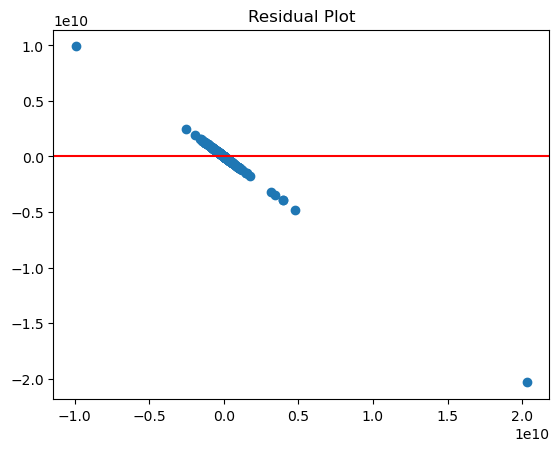

In [ ]:
# residuals
residuals = y_test - ridge_transformed_model.predict(X_test)
plt.scatter(ridge_transformed_model.predict(X_test), residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.show()

In [ ]:
# creating and fitting a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


# making predictions
y_pred_train_lr = lr_model.predict(X_train)
y_pred_test_lr = lr_model.predict(X_test)


# calculating r-squared and rmse
r2_train_lr = r2_score(y_train, y_pred_train_lr)
rmse_train_lr = mean_squared_error(y_train, y_pred_train_lr, squared=False)
r2_test_lr = r2_score(y_test, y_pred_test_lr)
rmse_test_lr = mean_squared_error(y_test, y_pred_test_lr, squared=False)

print("train R-squared:", r2_train_lr)
print("train RMSE:", rmse_train_lr)
print("test R-squared:", r2_test_lr)
print("test RMSE:", rmse_test_lr)



Linear Regression Model Performance:
Training R-squared: 0.5518278955781193
Training RMSE: 2116915031.8153949
Testing R-squared: -7.531071891849891e+30
Testing RMSE: 2.1154985436967875e+20


Results

Linear Regression Model:
- Train R-squared: 0.5518278955781193
- Train RMSE: 2116915031.8153949
- Test R-squared: -7.531071891849891e+30
- Test RMSE: 2.1154985436967875e+20


Feature Selection Activities 
- The SelectFromModel method was used 


Hyperparameter Tuning / Grid Search Improvements
- For the Random Forest Regressor, extensive grid search was performed to find the best parameters
- Additionally, a reduced grid search was conducted

In [ ]:
# hyperparameter tuning and grid search improvements
print("Hyperparameter Changes / Grid Search Improvements:")
print("Best parameters for Random Forest Regressor:", best_params)
print("Best parameters for Random Forest Regressor (reduced grid search):", best_params_grid_reduced)

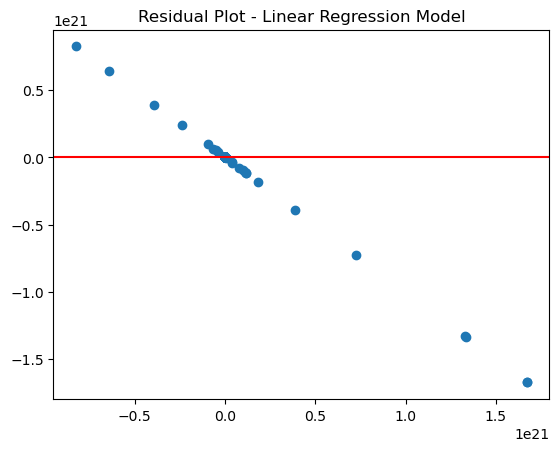

In [ ]:
# residuals with linear regression 
residuals_lr = y_test - lr_model.predict(X_test)
plt.scatter(lr_model.predict(X_test), residuals_lr)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot - Linear Regression Model')
plt.show()
